In [1]:
# Data Preprocessing and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Resampling, Scaling, Feature Engineering
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Train-Test Split 
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Deep Learning Models
import torch
from torch import nn, optim
import torch.nn.functional as F

# Optimization and Evaluation
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Import Libraries for Saving Model
import pickle

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
df = pd.read_csv("data\\2022\\heart_2022_no_nans.csv")
df.head(10)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.85,120.20,34.96,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
6,Alabama,Female,Good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",No,...,1.63,88.00,33.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Male,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,Yes,...,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
8,Alabama,Male,Good,2.0,0.0,5 or more years ago,No,6.0,None of them,No,...,1.70,78.02,26.94,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
9,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.68,63.50,22.60,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
print(f'Shape of data: {df.shape}\n')
print(f'Columns of data: {df.columns}\n')

Shape of data: (246022, 40)

Columns of data: Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')



In [4]:
print(f'Dataframe Info:\n')
df.info()

Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCance

# Drop Duplicates

In [5]:
print(f'Duplicates in data: {df.duplicated().sum()}')

Duplicates in data: 9


In [6]:
df.drop_duplicates(inplace=True)

# Missing Values

In [7]:
print("Missing Values in Data:")
df.isna().sum().sort_values(ascending=False)

Missing Values in Data:


State                        0
Sex                          0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
DifficultyConcentrating      0
BlindOrVisionDifficulty      0
DeafOrHardOfHearing          0
HadHeartAttack               0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadAngina                    0
HadDiabetes                  0
HadStrok

# Feature Selection

In [8]:
df.drop(columns = ['State', 'Sex'], inplace = True)

In [9]:
# Encoding target
replacement_dict = {'Yes': 1, 'No': 0}
df['HadHeartAttack'] = df['HadHeartAttack'].replace(replacement_dict)
df['HadAngina'] = df['HadAngina'].replace(replacement_dict)

# Create a new column that will be our target column
df['HeartDisease'] = df['HadHeartAttack'] | df['HadAngina']

# Drop old columns
df.drop(columns = ['HadHeartAttack','HadAngina'], inplace = True)

print(f'Shape of data: {df.shape}\n')

Shape of data: (246013, 37)



# EDA

In [10]:
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Numerical Columns: {numeric_cols}\n')
print(f'Categorical Columns: {categorical_cols}\n')

Numerical Columns: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

Categorical Columns: ['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']



In [11]:
print(f'Stats of numerical features:\n')
df.describe()

Stats of numerical features:



,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258,0.087865
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005,0.283099
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000,0.000000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000,0.000000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000,1.000000


In [12]:
print("Categorical Features Unique Values:\n")
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Categorical Features Unique Values:

GeneralHealth: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
LastCheckupTime: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
PhysicalActivities: ['Yes' 'No']
RemovedTeeth: ['None of them' '6 or more, but not all' '1 to 5' 'All']
HadStroke: ['No' 'Yes']
HadAsthma: ['No' 'Yes']
HadSkinCancer: ['No' 'Yes']
HadCOPD: ['No' 'Yes']
HadDepressiveDisorder: ['No' 'Yes']
HadKidneyDisease: ['No' 'Yes']
HadArthritis: ['Yes' 'No']
HadDiabetes: ['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']
DeafOrHardOfHearing: ['No' 'Yes']
BlindOrVisionDifficulty: ['No' 'Yes']
DifficultyConcentrating: ['No' 'Yes']
DifficultyWalking: ['No' 'Yes']
DifficultyDressingBathing: ['No' 'Yes']
DifficultyErrands: ['No' 'Yes']
SmokerStatus: ['Former smoker' 'Never smoked' 'Current smoker - now 

In [13]:
# Define some colors for the visualizations
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

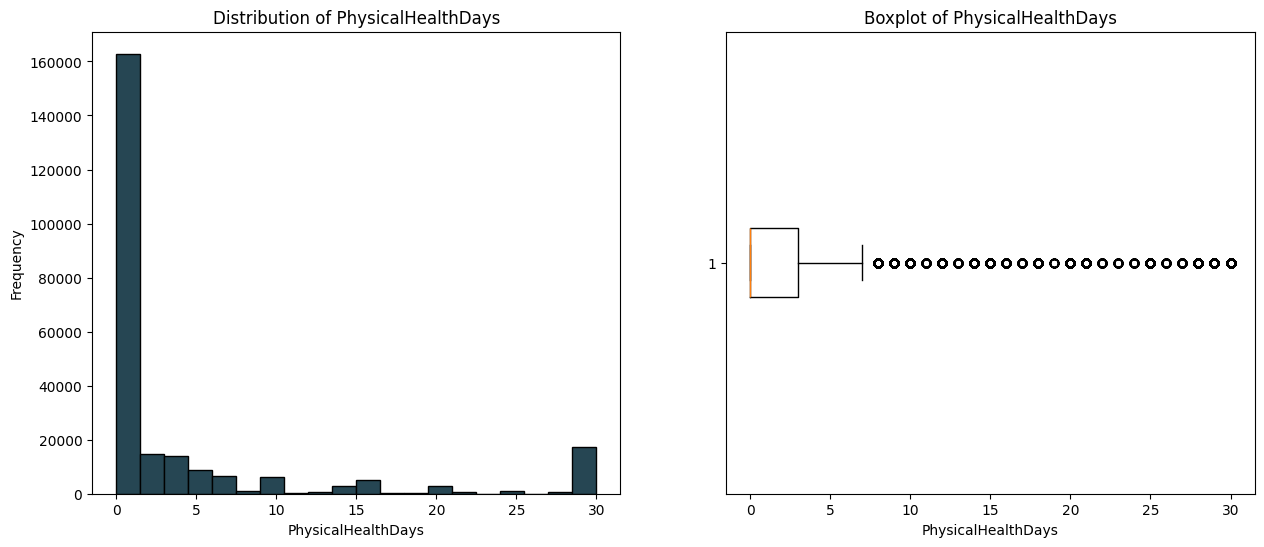

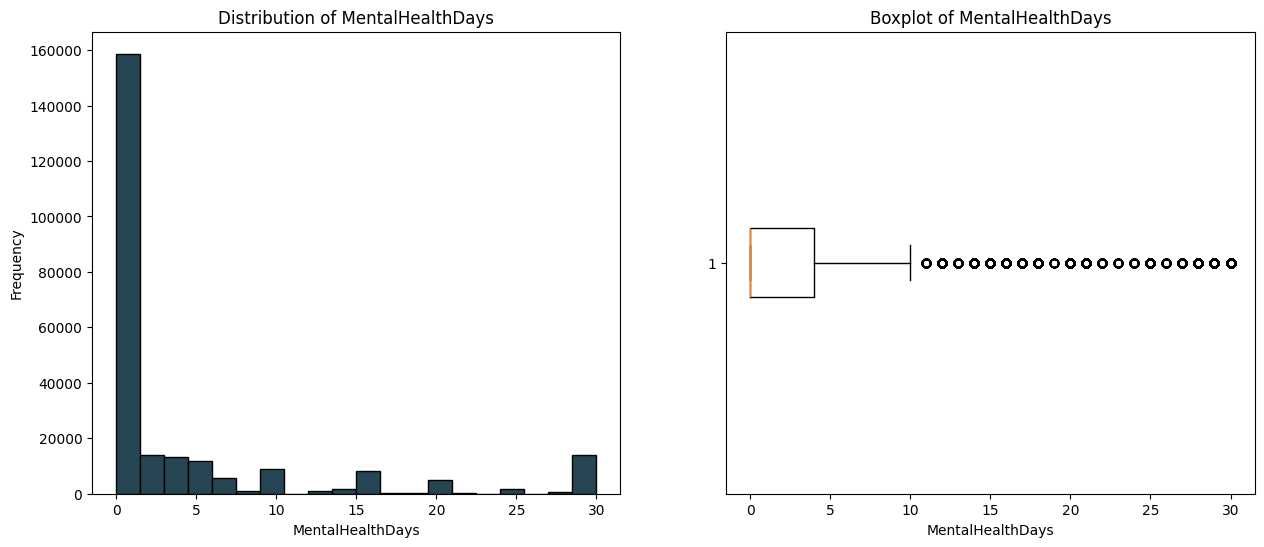

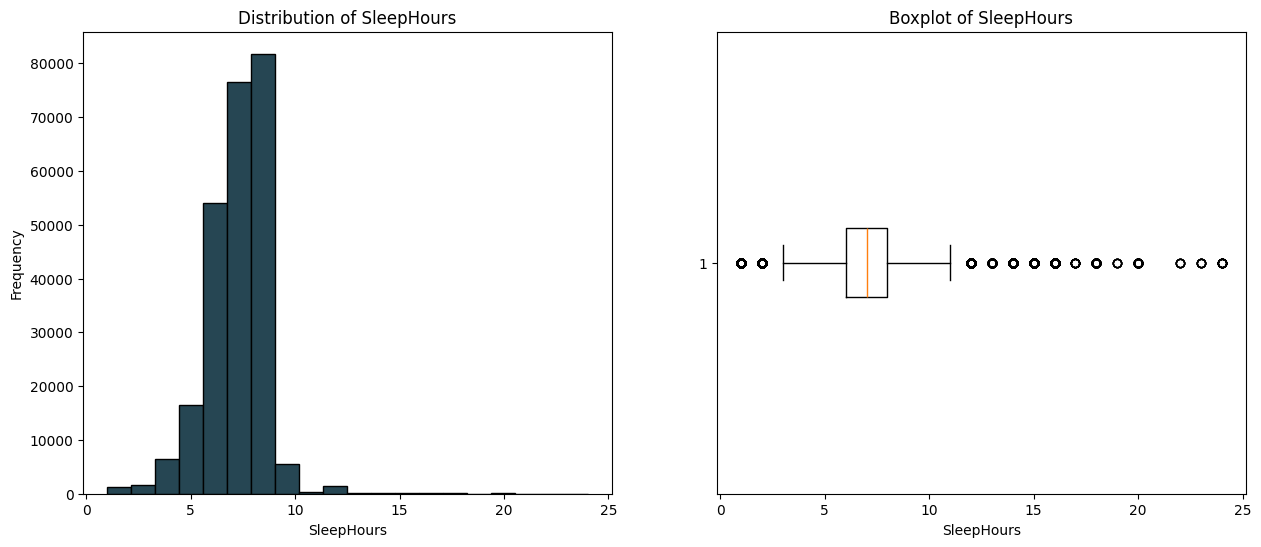

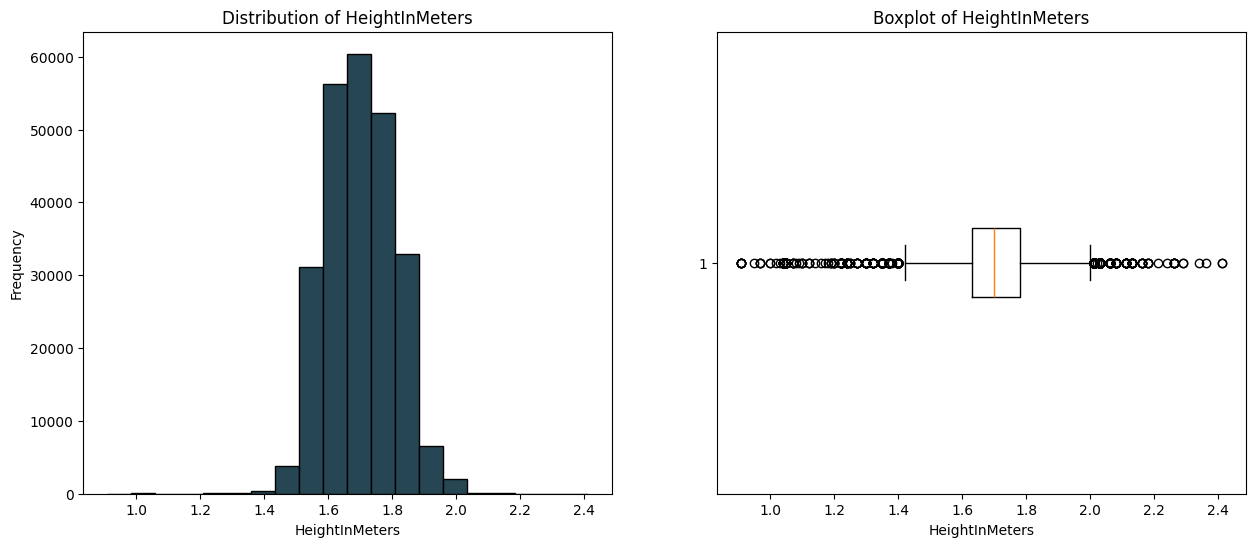

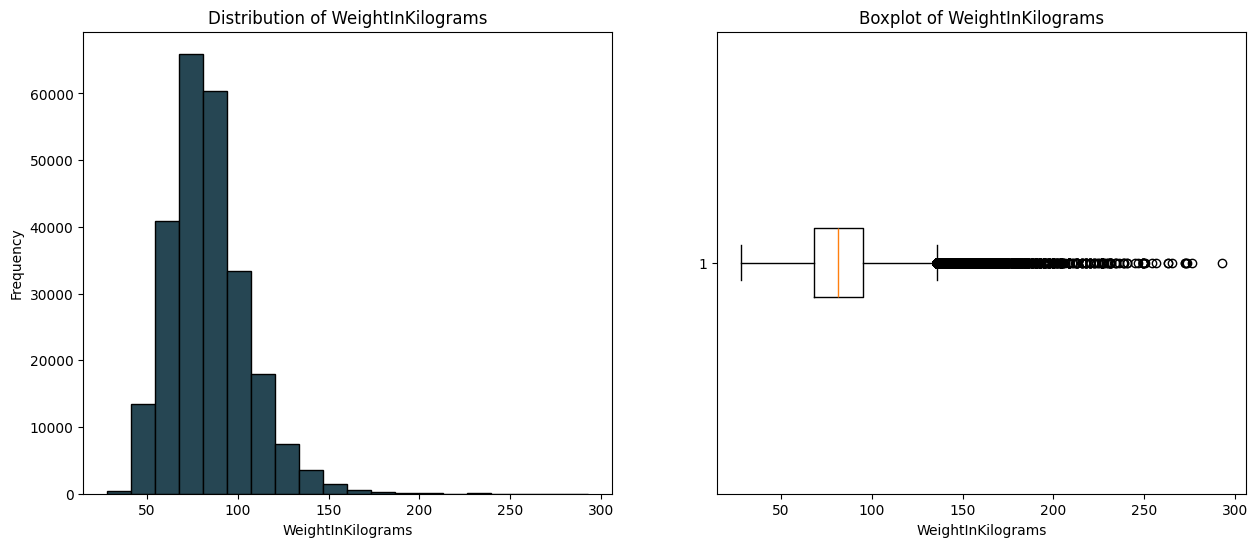

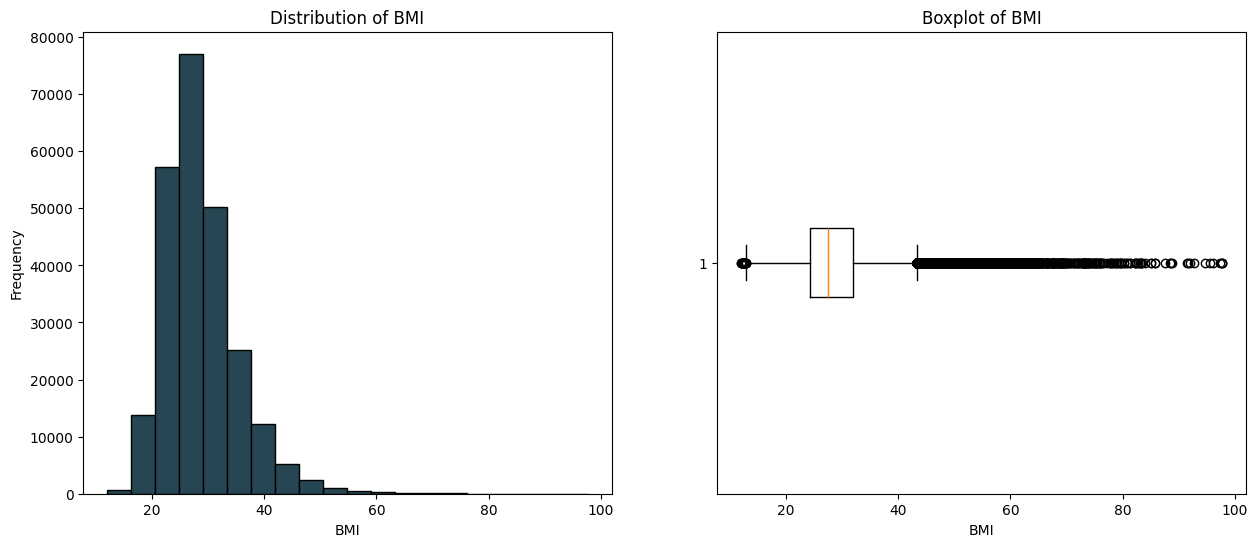

In [14]:
def numerical_distribution(df, numeric_cols):
    for col in numeric_cols:
        # Create a figure and a set of subplots
        _, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        # Create histogram on the first subplot
        axs[0].hist(df[col], bins=20, edgecolor='black', color=colors[0])
        axs[0].set_title(f'Distribution of {col}')
        axs[0].set_xlabel(col)
        axs[0].set_ylabel('Frequency')

        # Create boxplot on the second subplot
        axs[1].boxplot(df[col], vert=False)
        axs[1].set_title(f'Boxplot of {col}')
        axs[1].set_xlabel(col)

        plt.show()
        
numerical_distribution(df, numeric_cols)

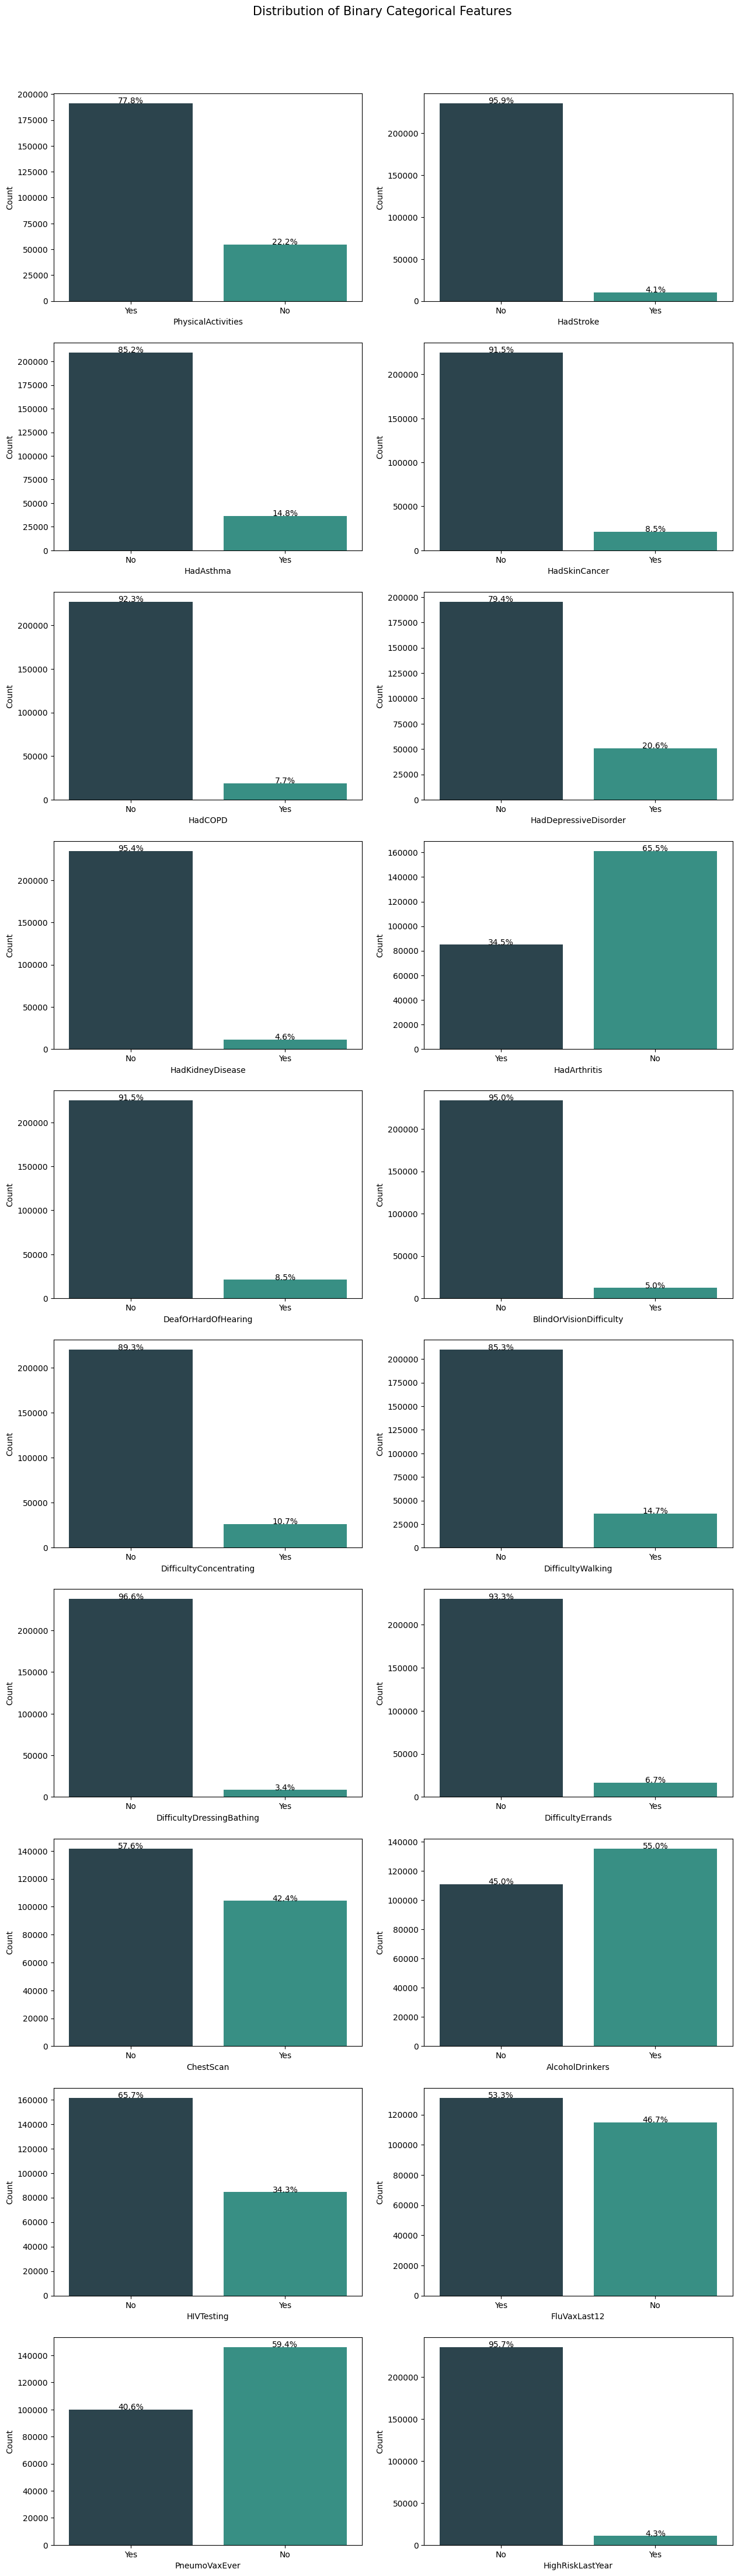

In [15]:
binary_categorical_cols = [col for col in categorical_cols if df[col].nunique() == 2]

L = len(binary_categorical_cols)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
plt.subplots_adjust(top=0.95)
i = 0

for col in binary_categorical_cols:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, palette=colors, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
plt.suptitle('Distribution of Binary Categorical Features', fontsize=15)
plt.show()

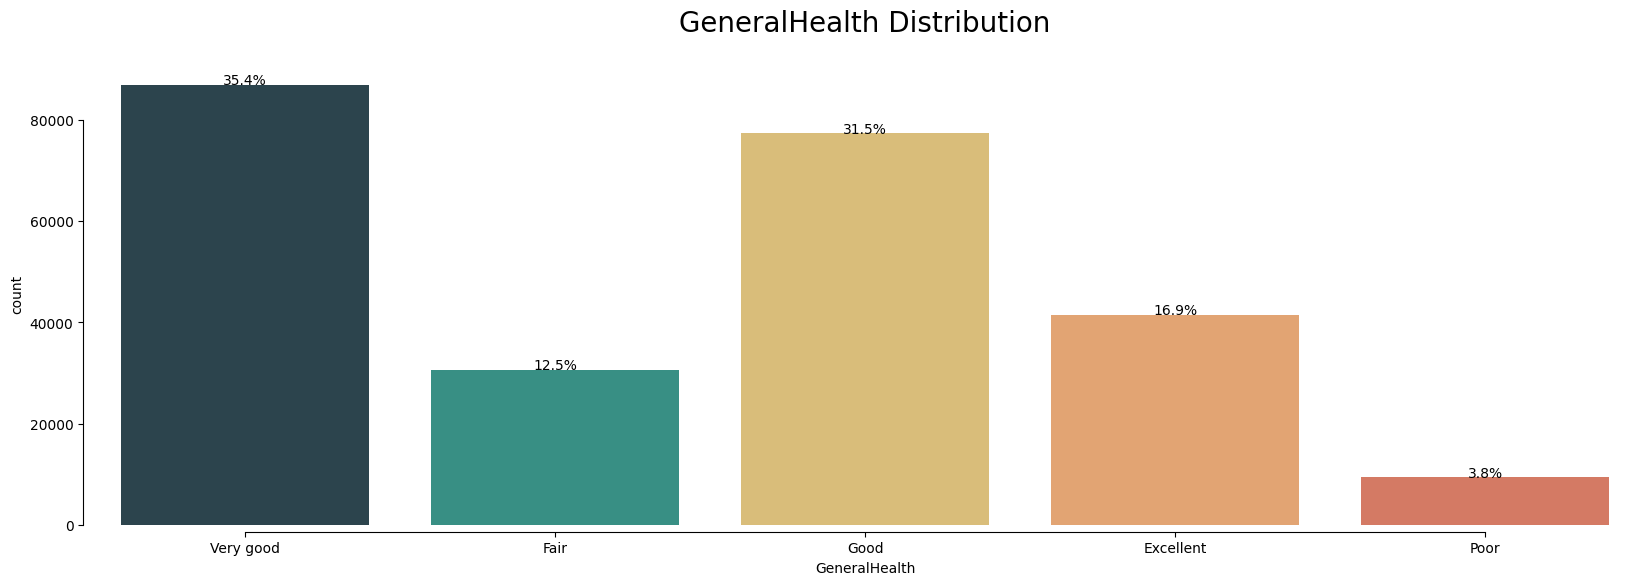

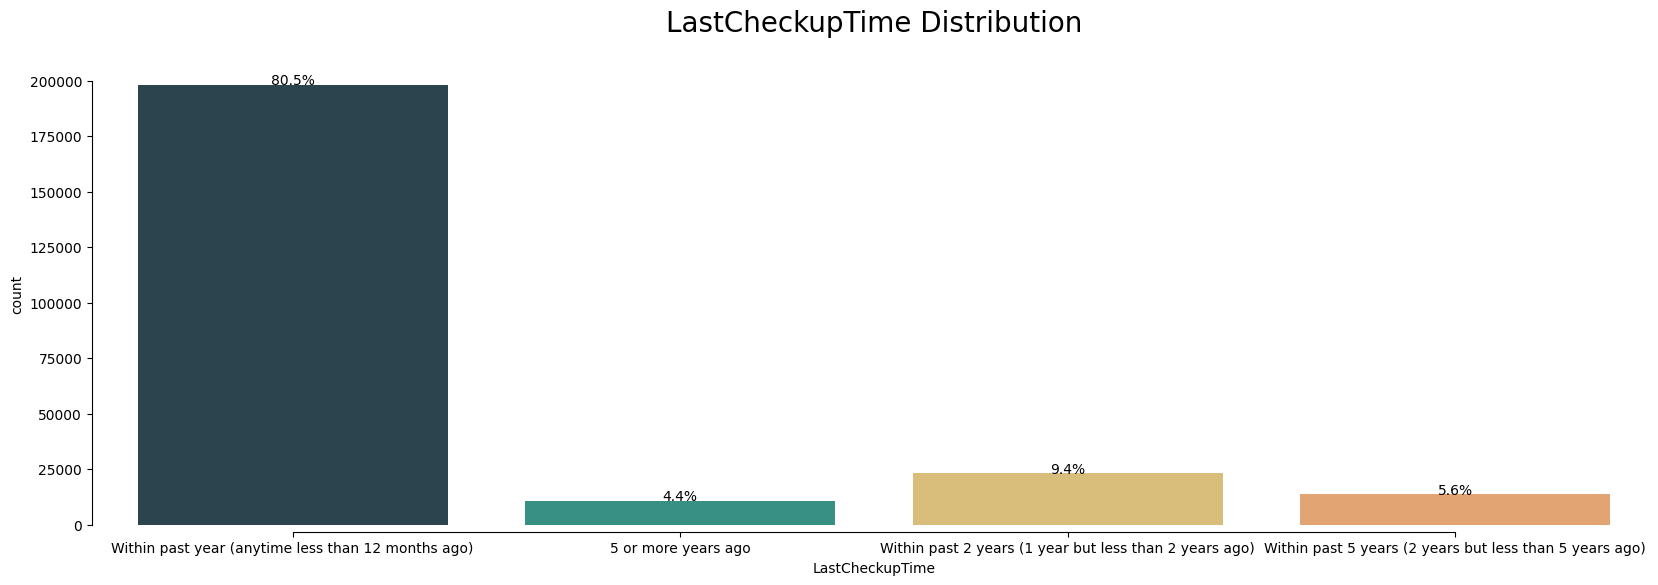

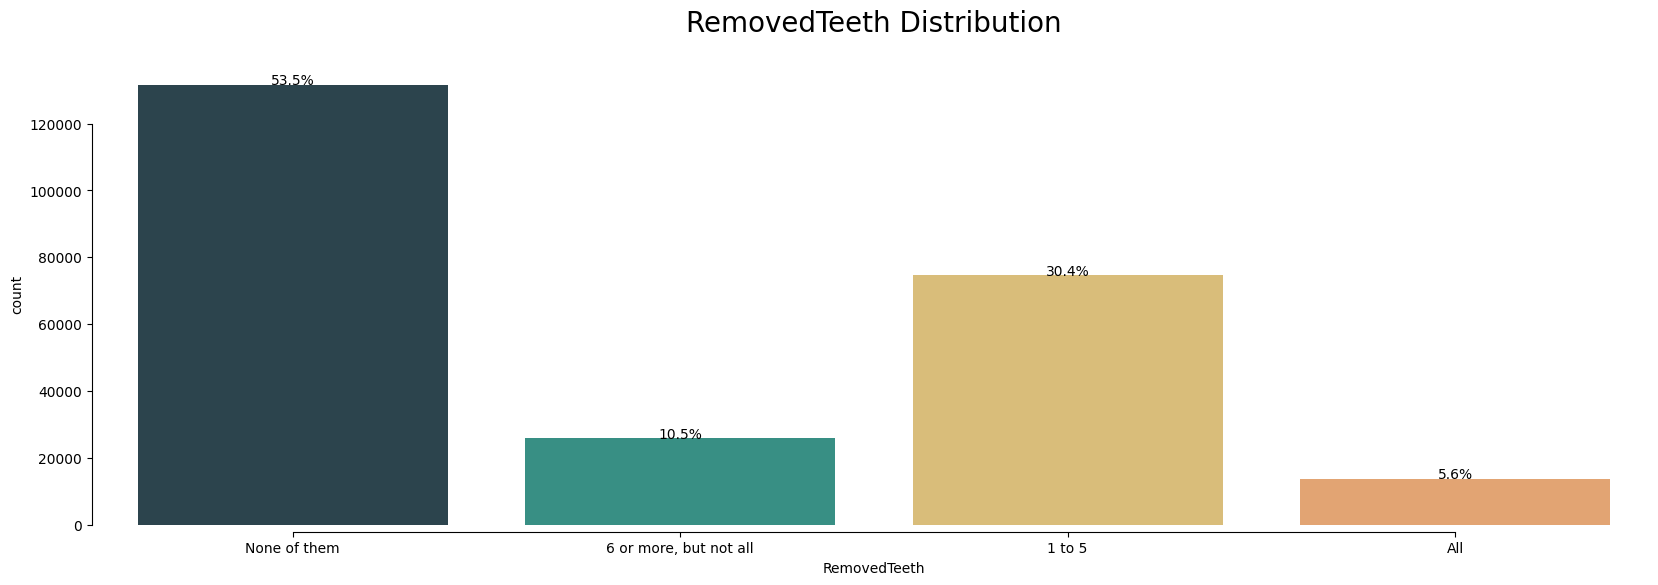

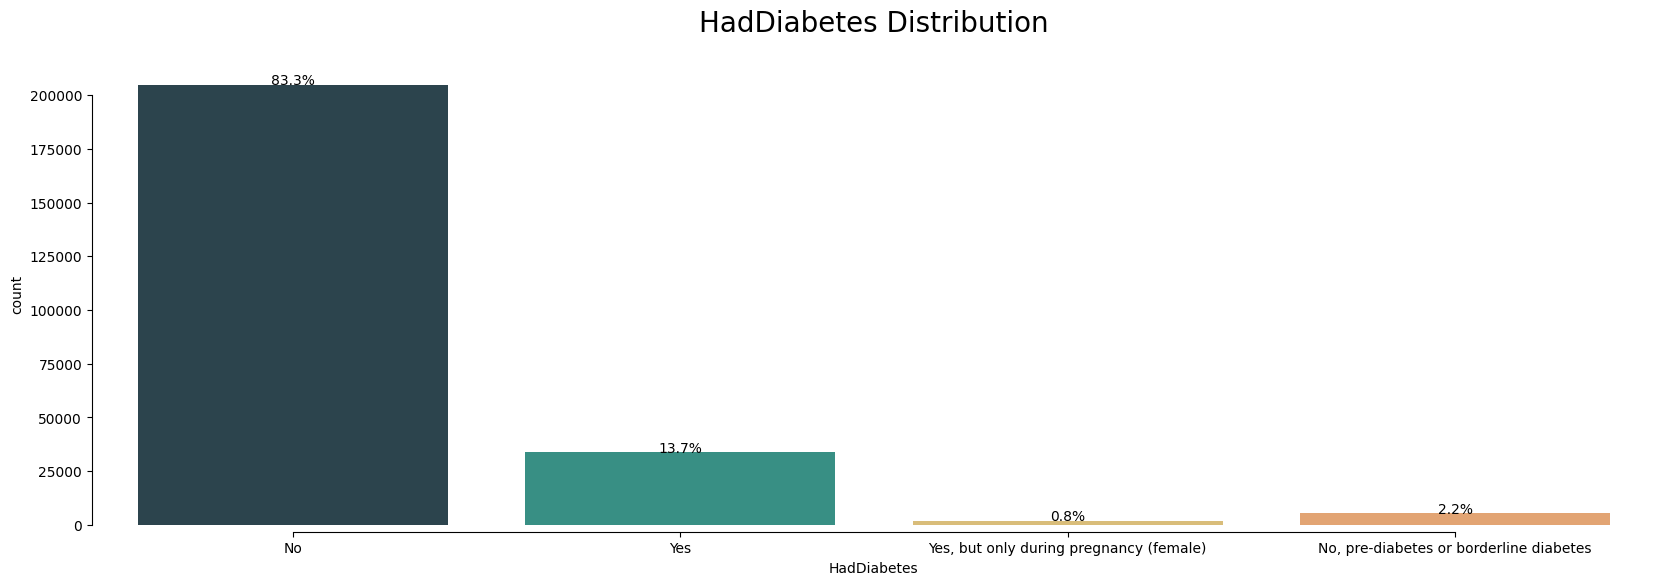

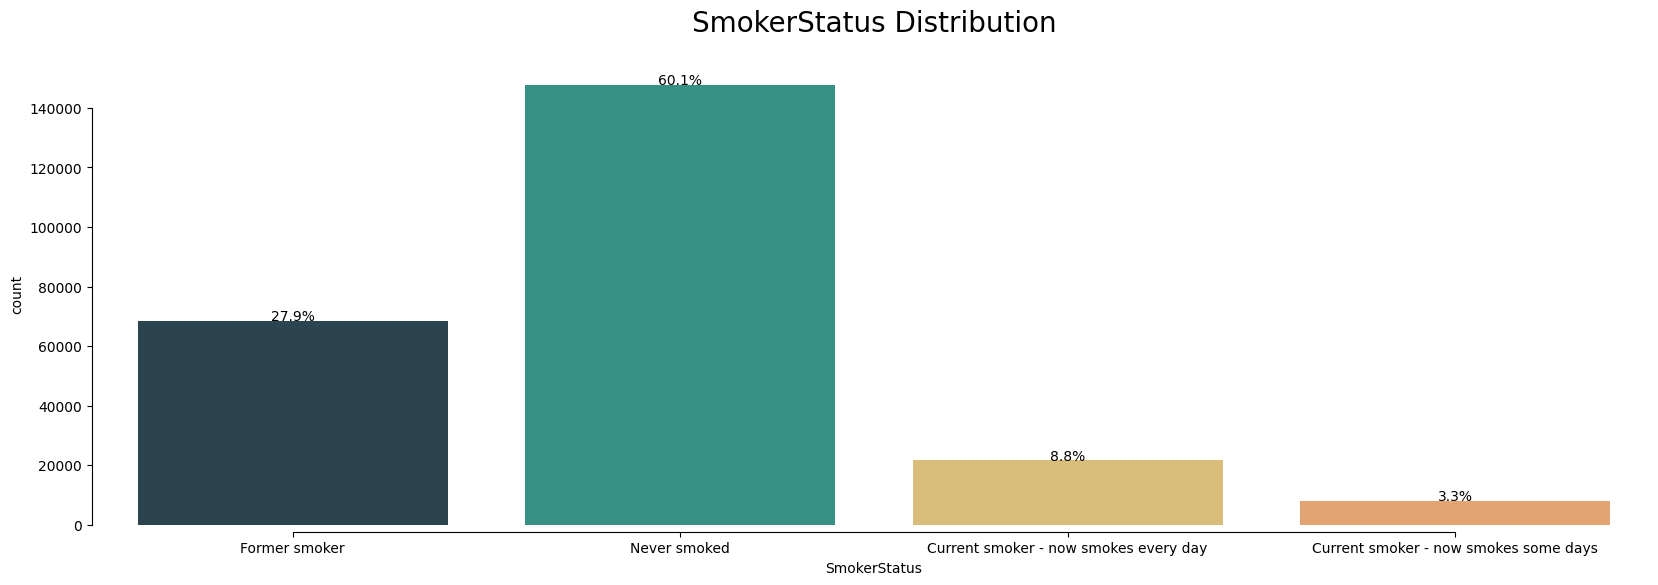

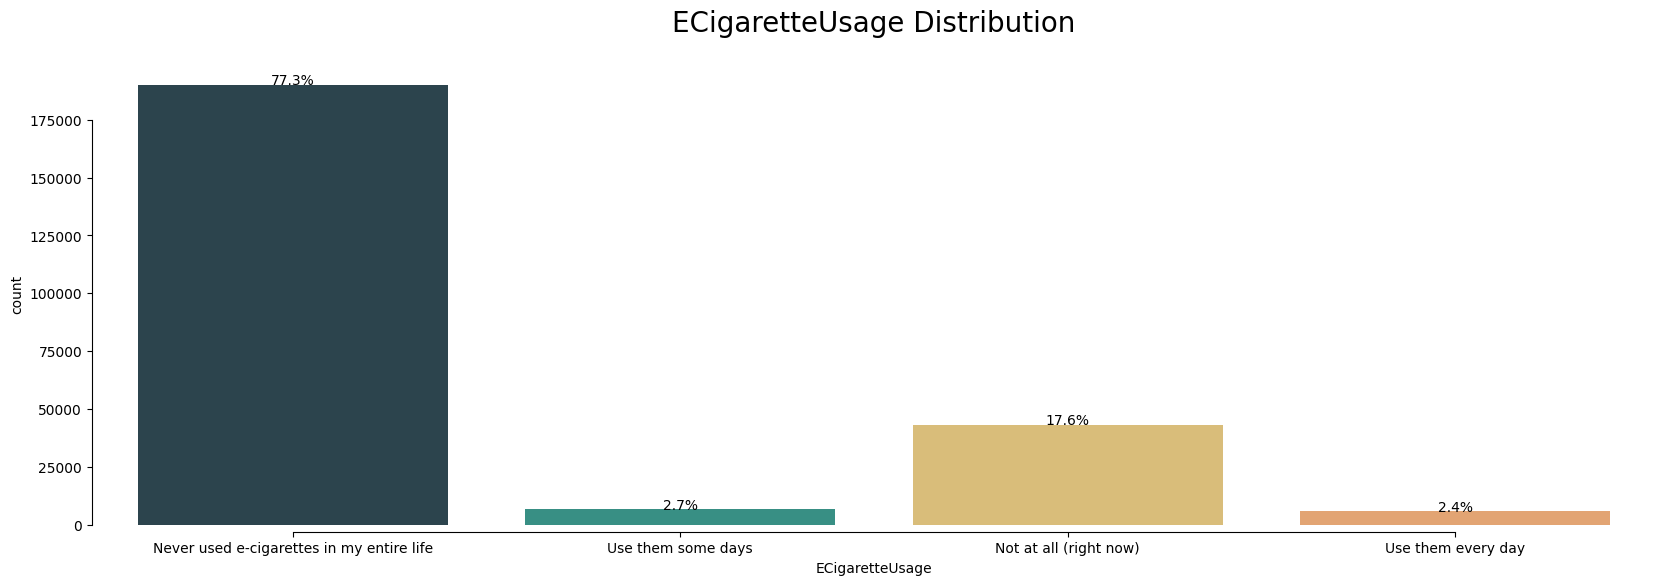

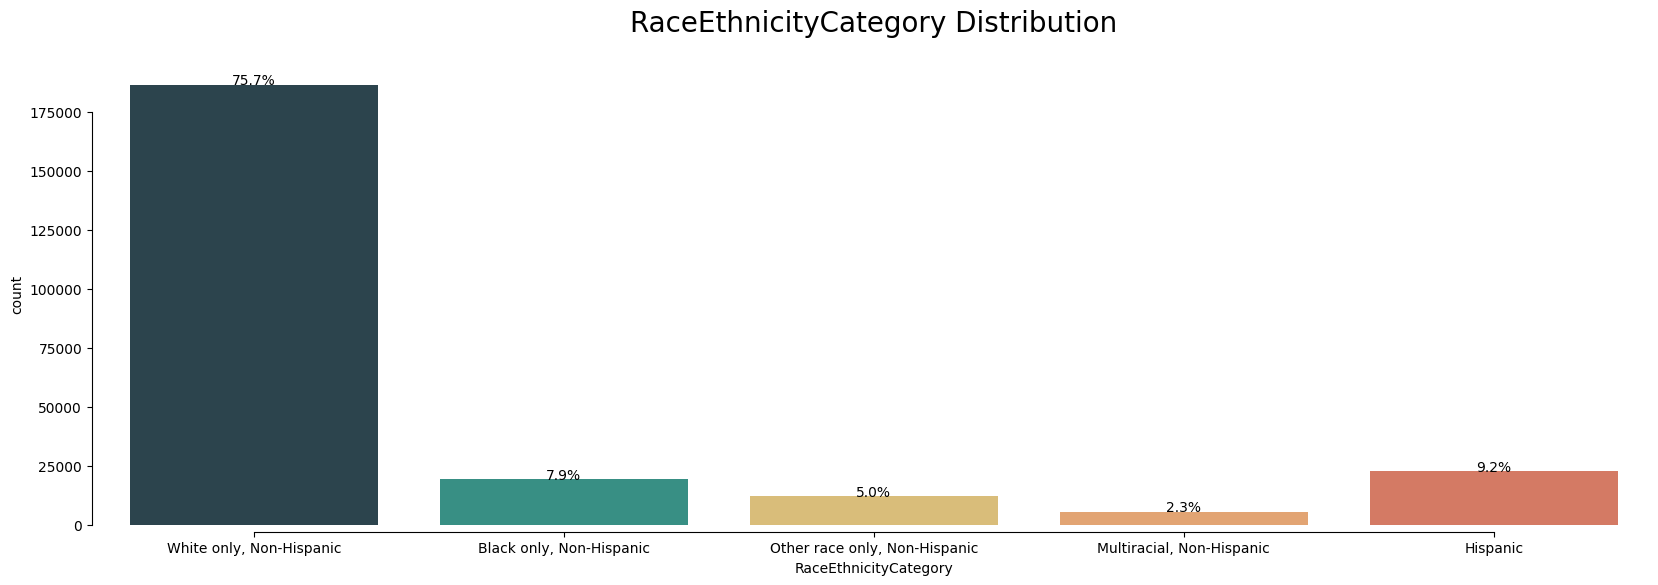

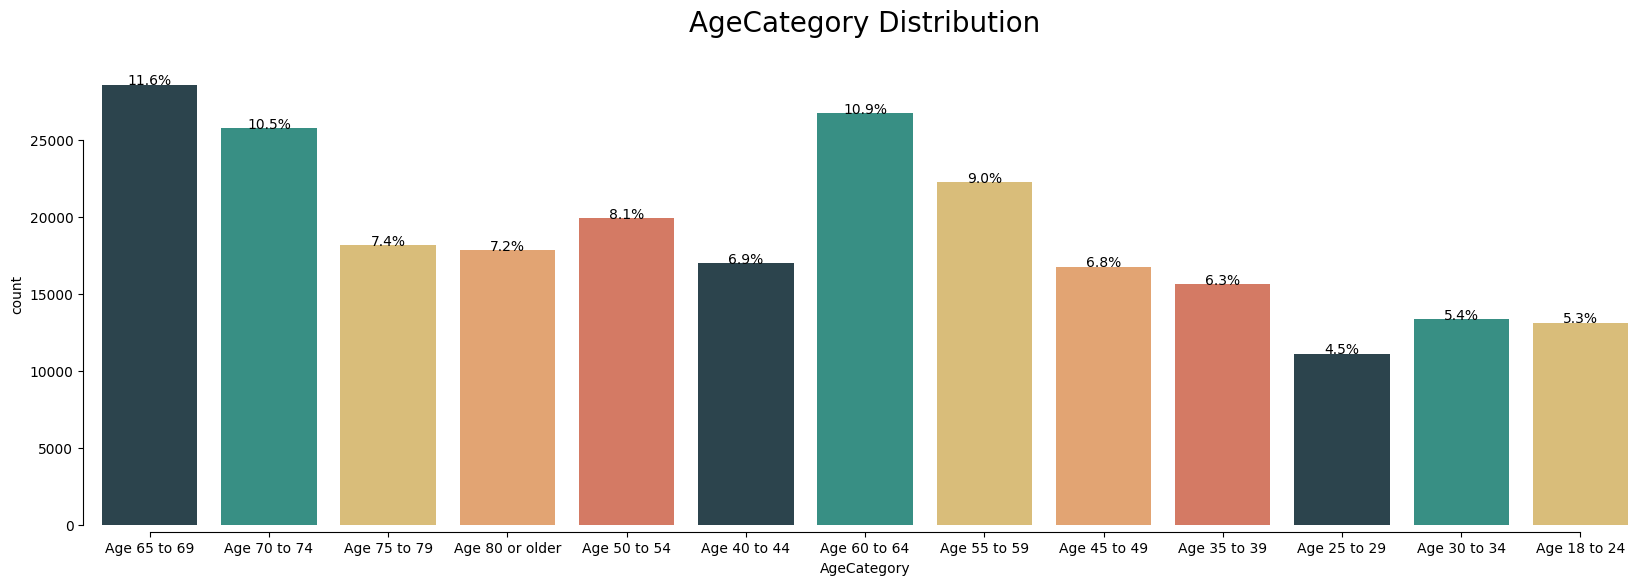

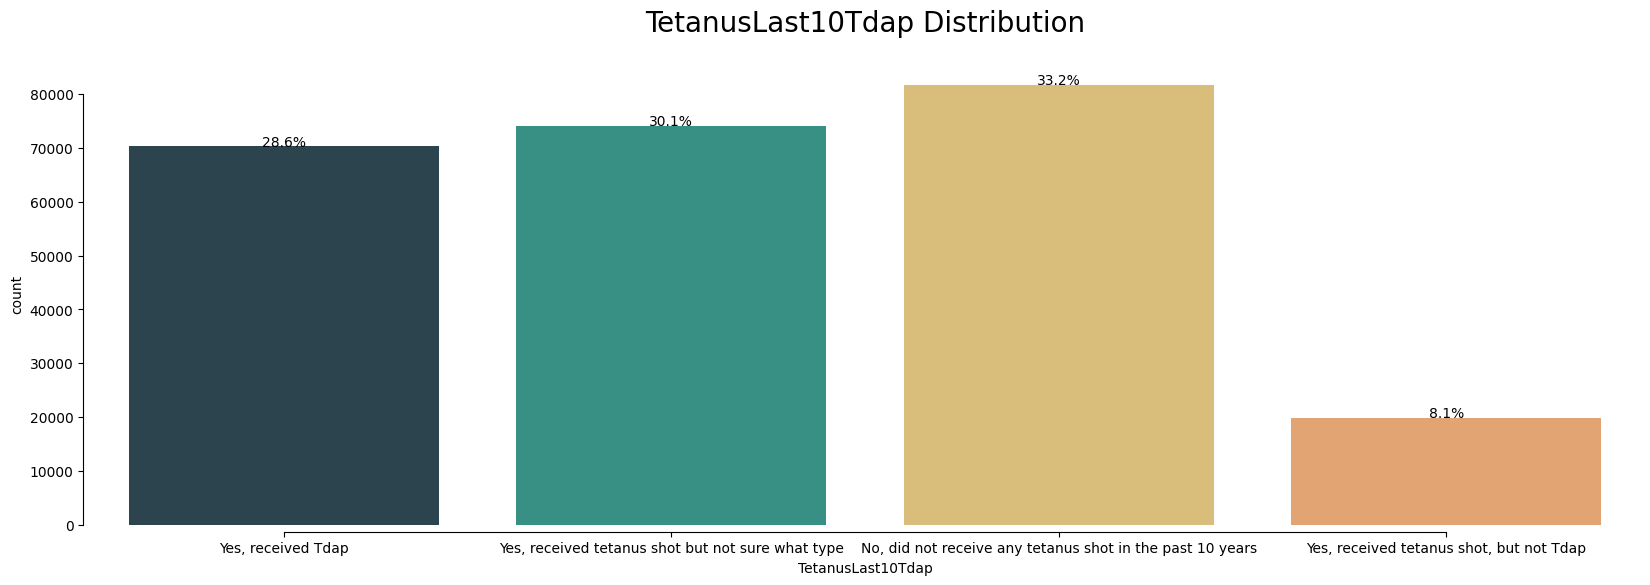

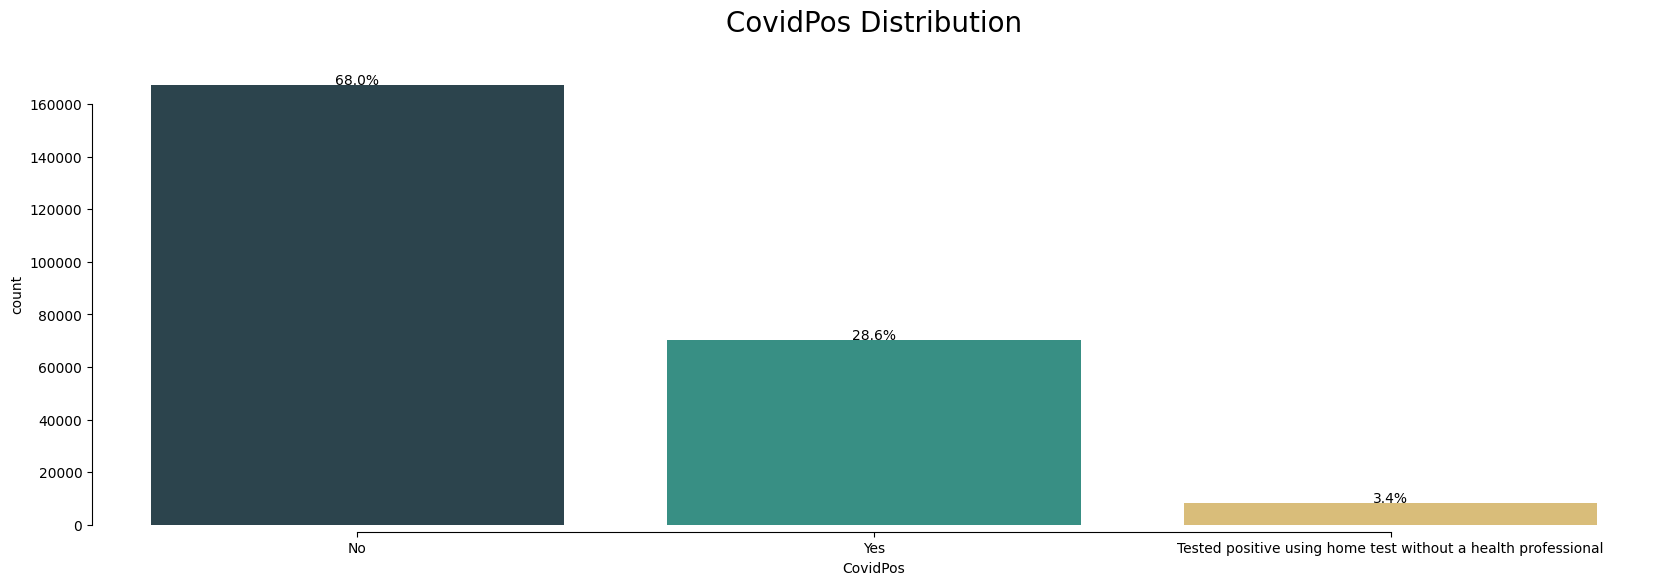

In [16]:
non_binary_categorical_cols = [col for col in categorical_cols if df[col].nunique() > 2]

for col in non_binary_categorical_cols:
    plt.figure(figsize=(20, 6))
    total = float(len(df))
    ax = sns.countplot(x=df[col], palette=colors)

    for p in ax.patches:
        
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    ax.set_title(f'{col} Distribution', fontsize=20, y=1.05)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

In [17]:
print("Non Binary Categorical Features Unique Values:\n")
for column in non_binary_categorical_cols:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Non Binary Categorical Features Unique Values:

GeneralHealth: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
LastCheckupTime: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)']
RemovedTeeth: ['None of them' '6 or more, but not all' '1 to 5' 'All']
HadDiabetes: ['No' 'Yes' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']
SmokerStatus: ['Former smoker' 'Never smoked' 'Current smoker - now smokes every day'
 'Current smoker - now smokes some days']
ECigaretteUsage: ['Never used e-cigarettes in my entire life' 'Use them some days'
 'Not at all (right now)' 'Use them every day']
RaceEthnicityCategory: ['White only, Non-Hispanic' 'Black only, Non-Hispanic'
 'Other race only, Non-Hispanic' 'Multiracial, Non-Hispanic' 'Hispanic']
AgeCategory: ['Age 65 to 69' 'Age 70 to 74' 'Age 75 to 79' 'Age 80 or older'
 'Age 50 

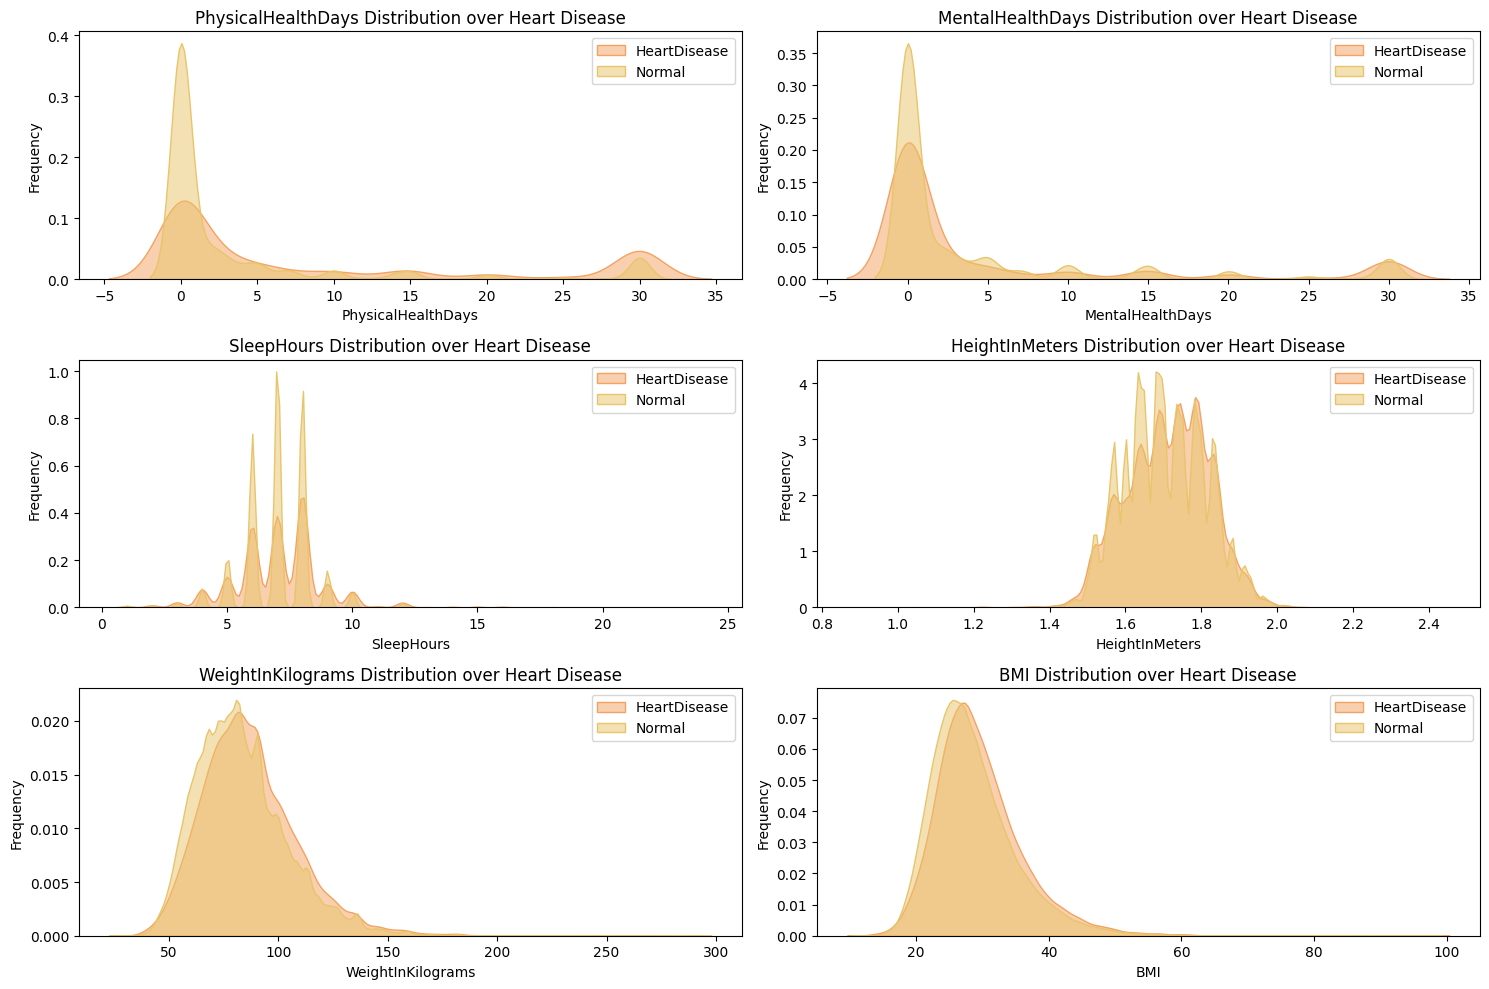

In [21]:
# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols) // 2, ncols=2, figsize=(15, 10))

for idx, column in enumerate(numeric_cols):
    # Get row and col index
    row_idx = idx // 2
    col_idx = idx % 2
    
    # Plot the frequency of HeartDisease and Normal over the column
    sns.kdeplot(df[df["HeartDisease"] == 1][column], alpha=0.5, fill=True, color=colors[3], label="HeartDisease", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["HeartDisease"] == 0][column], alpha=0.5, fill=True, color=colors[2], label="Normal", ax=axes[row_idx, col_idx])
    
    # Labels and legends
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Heart Disease")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

# Multicollinearity

<Axes: >

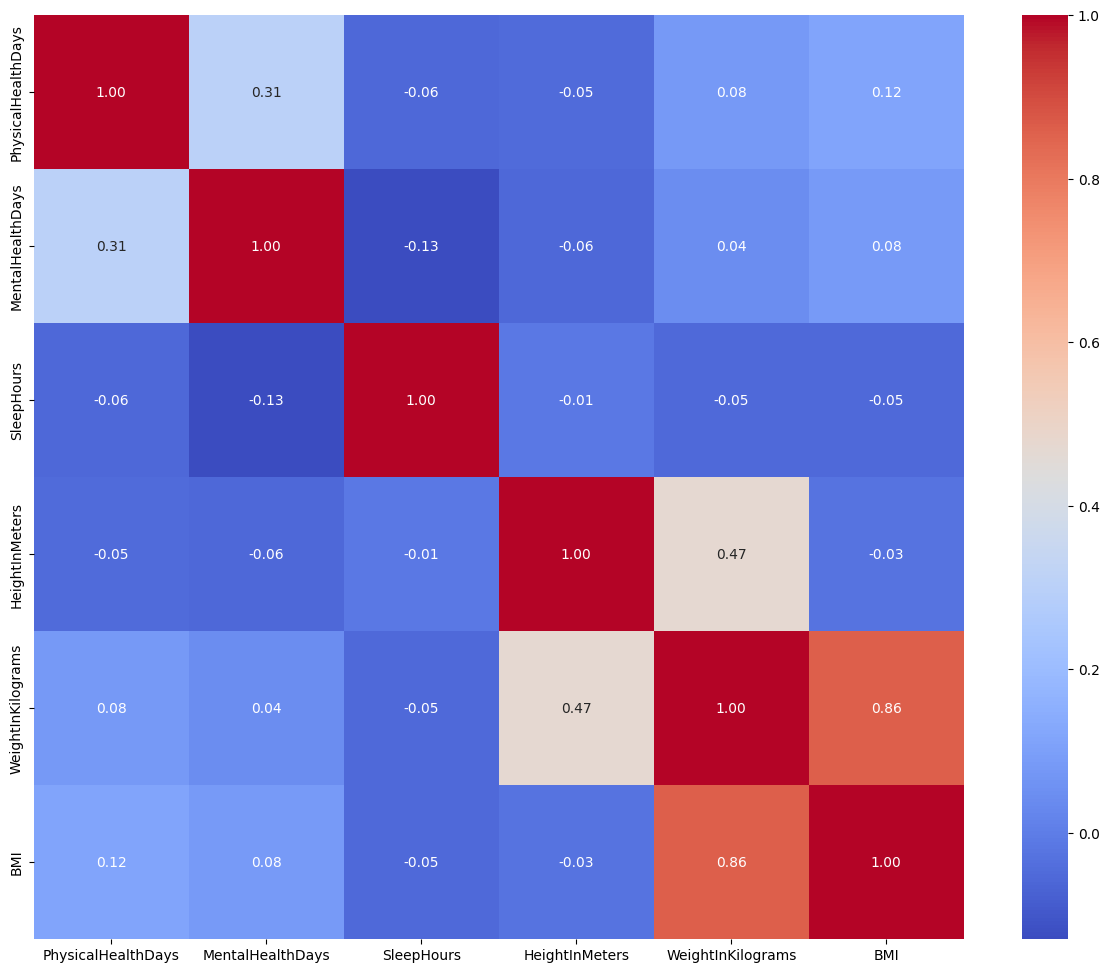

In [22]:
corr = df.select_dtypes(include=['float64']).corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

In [23]:
df.drop(columns='WeightInKilograms', inplace=True)

# Encode Categorical Data

In [25]:
for col in binary_categorical_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,HadAsthma,HadSkinCancer,...,HeightInMeters,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,0,...,1.60,27.99,0,0,1,1,"Yes, received Tdap",0,No,0
1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,0,0,...,1.78,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,No,0
2,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,0,0,...,1.85,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,Yes,0
3,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,1,...,1.70,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes,0
4,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,0,0,...,1.55,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No,0
5,Good,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,None of them,0,0,0,...,1.85,34.96,1,1,1,0,"Yes, received tetanus shot but not sure what type",0,No,0
6,Good,3.0,0.0,Within past year (anytime less than 12 months ...,1,8.0,"6 or more, but not all",1,0,0,...,1.63,33.30,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No,0
7,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,8.0,1 to 5,0,0,1,...,1.75,24.37,0,1,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes,1
8,Good,2.0,0.0,5 or more years ago,0,6.0,None of them,0,0,0,...,1.70,26.94,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes,0
9,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,None of them,0,1,1,...,1.68,22.60,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No,0


In [ ]:
gen_health_map = {'Excellent': 4, 'Very good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0}

last_checkup_time_map = {
    'Within past year (anytime less than 12 months ago)': 3,
    'Within past 2 years (1 year but less than 2 years ago)': 2,
    'Within past 5 years (2 years but less than 5 years ago)': 1,
    '5 or more years ago': 0
}

removed_teeth_map = {
    'None of them': 3,
    '1 to 5': 2,
    '6 or more, but not all': 1,
    'All': 0
}

had_diabetes_map = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 1,
    'Yes, but only during pregnancy (female)': 2,
    'Yes': 3,
}

smoker_status_map = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}

e_cigarette_usage_map = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them some days': 2,
    'Use them every day': 3
}

age_category_map = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

tetanus_last_10_tdap_map = {
    'Yes, received Tdap': 0,
    'Yes, received tetanus shot but not sure what type': 1,
    'Yes, received tetanus shot, but not Tdap': 2,
    'No, did not receive any tetanus shot in the past 10 years': 3
}

covid_pos_map = {
    'No': 0,
    'Tested positive using home test without a health professional': 1,
    'Yes': 2
}

In [26]:
df['GeneralHealth'] = df['GeneralHealth'].map(gen_health_map)
df['LastCheckupTime'] = df['LastCheckupTime'].map(last_checkup_time_map)
df['RemovedTeeth'] = df['RemovedTeeth'].map(removed_teeth_map)
df['HadDiabetes'] = df['HadDiabetes'].map(had_diabetes_map)
df['SmokerStatus'] = df['SmokerStatus'].map(smoker_status_map)
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(e_cigarette_usage_map)
df['AgeCategory'] = df['AgeCategory'].map(age_category_map)
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map(tetanus_last_10_tdap_map)
df['CovidPos'] = df['CovidPos'].map(covid_pos_map)

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,HadAsthma,HadSkinCancer,...,HeightInMeters,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,3,4.0,0.0,3,1,9.0,3,0,0,0,...,1.60,27.99,0,0,1,1,0,0,0,0
1,3,0.0,0.0,3,1,6.0,3,0,0,0,...,1.78,30.13,0,0,1,1,1,0,0,0
2,3,0.0,0.0,3,0,8.0,1,0,0,0,...,1.85,31.66,1,0,0,1,3,0,2,0
3,1,5.0,0.0,3,1,9.0,3,0,0,1,...,1.70,31.32,0,0,1,1,3,0,2,0
4,2,3.0,15.0,3,1,5.0,2,0,0,0,...,1.55,33.07,0,0,1,1,3,0,0,0
5,2,0.0,0.0,3,1,7.0,3,0,0,0,...,1.85,34.96,1,1,1,0,1,0,0,0
6,2,3.0,0.0,3,1,8.0,1,1,0,0,...,1.63,33.30,0,0,1,1,3,0,0,0
7,1,5.0,0.0,3,1,8.0,2,0,0,1,...,1.75,24.37,0,1,1,1,3,0,2,1
8,2,2.0,0.0,0,0,6.0,3,0,0,0,...,1.70,26.94,0,0,0,0,3,0,2,0
9,3,0.0,0.0,3,1,7.0,3,0,1,1,...,1.68,22.60,0,0,1,1,3,0,0,0


In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), categorical_cols)],
    remainder='passthrough')

X_transformed = preprocessor.fit_transform(df.drop(columns='HeartDisease'))
y = df['HeartDisease']

Categorical Columns: ['RaceEthnicityCategory']

X_transformed shape: (246013, 39)



In [29]:
print(f'Target Distribution:\n{y.value_counts(normalize=True)}')

Target Distribution:
HeartDisease
0    0.912135
1    0.087865
Name: proportion, dtype: float64


# Resampling

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Use SMOTE to oversample the minority class in the training set
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=0.1)
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_resampled, y_train_resampled)
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

X_train shape: (196810, 39)
y_train shape: (196810,)
X_test shape: (49203, 39)
y_test shape: (49203,)
X_train_resampled shape: (346400, 39)
y_train_resampled shape: (346400,)


In [31]:
print(f'Target Distribution:\n{y_train_resampled.value_counts(normalize=True)}')

Target Distribution:
HeartDisease
0    0.5
1    0.5
Name: proportion, dtype: float64


# Training and Evaluation

In [32]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    print("Cross Validation Score:", cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc').mean())
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, cmap='coolwarm', fmt='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# Random Forest Classifier

Cross Validation Score: 0.9811088248843932
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44907
           1       0.41      0.10      0.16      4296

    accuracy                           0.91     49203
   macro avg       0.67      0.54      0.55     49203
weighted avg       0.88      0.91      0.88     49203



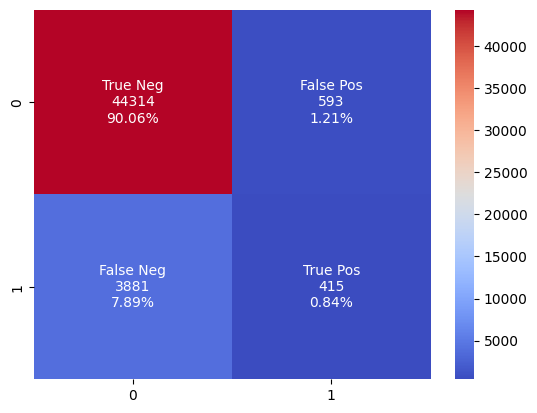

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
train_model(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)
model_evaluation(rf_classifier, X_test, y_test)

In [102]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 3})
rf.fit(X_train_resampled, y_train_resampled)
y_pred_proba = rf.predict_proba(X_test)
threshold = 0.3
y_pred = (y_pred_proba[:,1] >= threshold).astype('int')
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8851899274434486
Precision Score: 0.350099711943275
Recall Score: 0.36778398510242083
ROC AUC Score: 0.651235613812929
F1 Score: 0.3587240322397548
Confusion Matrix:
 [[41974  2933]
 [ 2716  1580]]


In [103]:
lr = LogisticRegression(random_state=42, class_weight={0: 1, 1: 1})
lr.fit(X_train_resampled, y_train_resampled)
y_pred_proba = lr.predict_proba(X_test)
threshold = 0.5
y_pred = (y_pred_proba[:,1] >= threshold).astype('int')
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7449545759404914
Precision Score: 0.22359166722486437
Recall Score: 0.777001862197393
ROC AUC Score: 0.7594453272952805
F1 Score: 0.34725617685305593
Confusion Matrix:
 [[33316 11591]
 [  958  3338]]


In [104]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_proba = xgb.predict_proba(X_test)
threshold = 0.3
y_pred = (y_pred_proba[:,1] >= threshold).astype('int')
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8922423429465683
Precision Score: 0.37885356454720615
Recall Score: 0.36615456238361266
ROC AUC Score: 0.6543623815102423
F1 Score: 0.3723958333333333
Confusion Matrix:
 [[42328  2579]
 [ 2723  1573]]


In [ ]:
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = randomized_search_rf.best_estimator_
best_params_rf = randomized_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

model_evaluation(best_rf, X_test, y_test)

In [ ]:
param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'subsample': [0.2, 0.4, 0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7],
}

xgb = XGBClassifier()

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb = randomized_search_xgb.best_estimator_
best_params_xgb = randomized_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)

model_evaluation(best_xgb, X_test, y_test)